In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/wine.csv')

In [3]:
display(data.head())

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data.shape

(129971, 13)

Задание 4.1
Сколько всего дегустаторов приняло участие в винных обзорах?

In [5]:
data['taster_name'].nunique()

19

In [31]:
data.nunique()

country                      44
description              119955
designation               37980
points                       21
price                       391
province                    426
region_1                   1230
taster_name                  20
taster_twitter_handle        16
title                    118840
variety                     708
winery                    16757
dtype: int64

Задание 4.2
Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.

In [6]:
data['price'].max()

3300.0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

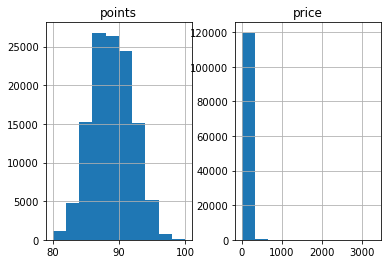

In [32]:
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = data.hist()
hist

In [ ]:
data.duplicated()

In [33]:
mask = data.duplicated(subset=data.columns) 
duplicates = data[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 0


In [19]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(119988, 13)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [30]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

In [25]:
data.drop(['region_2'], axis=1, inplace=True)

In [29]:
values = {
    'designation': 'unknown',
    'taster_twitter_handle': 'unknown',
    'taster_name': 'unknown',
    'region_1': 'unknown',
    'price': -1,
    'country': 'unknown',
    'province': 'unknown',
    'variety': 'unknown'
}
# Fill the empty cells
data = data.fillna(values)